# Kaggle

In [2]:
import os
import numpy as np
import cv2
import time

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import matplotlib.pyplot as plt
from PIL import Image

2024-11-26 10:42:07.934701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732614128.010485   12999 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732614128.032293   12999 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-26 10:42:08.210977: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


I0000 00:00:1732614195.883149   12999 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1732614195.884056   20587 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.3.5 - kisak-mesa PPA), renderer: AMD Radeon Graphics (radeonsi, renoir, LLVM 15.0.7, DRM 3.57, 6.8.0-1016-oracle)
W0000 00:00:1732614195.913211   20570 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732614195.932026   20582 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


(1920, 1080, 3)
[landmark {
  x: 0.502037704
  y: 0.969360232
  z: 2.78990683e-06
}
landmark {
  x: 0.707640469
  y: 0.879101157
  z: -0.221273452
}
landmark {
  x: 0.736340404
  y: 0.708967388
  z: -0.28683728
}
landmark {
  x: 0.539271355
  y: 0.572875559
  z: -0.332190335
}
landmark {
  x: 0.364607126
  y: 0.447694838
  z: -0.35711211
}
landmark {
  x: 0.753388524
  y: 0.547407806
  z: -0.0329526961
}
landmark {
  x: 0.673308372
  y: 0.387233973
  z: -0.100362912
}
landmark {
  x: 0.571950436
  y: 0.264015496
  z: -0.144344285
}
landmark {
  x: 0.469361901
  y: 0.174346894
  z: -0.174572229
}
landmark {
  x: 0.571611524
  y: 0.543670893
  z: 0.010364267
}
landmark {
  x: 0.577733934
  y: 0.370604277
  z: -0.0749564096
}
landmark {
  x: 0.554108
  y: 0.260608226
  z: -0.123550139
}
landmark {
  x: 0.516991854
  y: 0.163693428
  z: -0.140170604
}
landmark {
  x: 0.402482152
  y: 0.570833
  z: 0.0139517058
}
landmark {
  x: 0.310618341
  y: 0.451668501
  z: -0.180906251
}
landmark {
  

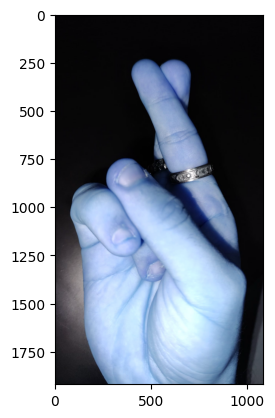

In [12]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)

image = cv2.imread('WhatsApp Image 2024-11-26 at 10.39.59.jpeg')
plt.imshow(image)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert the image to RGB.
print(image.shape)

results = hands.process(image_rgb)
print(results.multi_hand_landmarks)

if results.multi_hand_landmarks:

    h, w, c = image.shape 
    hand_landmarks = results.multi_hand_landmarks[0] 
    x_coords = [lm.x * w for lm in hand_landmarks.landmark]
    y_coords = [lm.y * h for lm in hand_landmarks.landmark]
    print(x_coords)
    print(y_coords)
    
    x_min = int(min(x_coords))
    x_max = int(max(x_coords))
    y_min = int(min(y_coords))
    y_max = int(max(y_coords))
    
    print(x_min, x_max, y_min, y_max)

    margin = 100
    hand_image = image[y_min-margin:y_max+margin, x_min-margin:x_max+margin ]

    #cv2.imshow('Hand Crop', hand_image)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    #cv2.imshow('Hand Crop', hand_image)
else:
    print("No hand detected.")

# Clean up.
hands.close()


(1706, 840, 3)

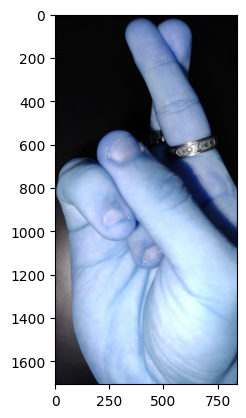

In [13]:
plt.imshow(hand_image)
hand_image.shape

array([[  5,   5,   5, ...,   5,   5,   5],
       [  5,   5,   5, ...,   5,   5,   5],
       [  5,   5,   5, ...,   5,   5,   5],
       ...,
       [ 19,  20,  21, ..., 117, 113, 109],
       [ 19,  21,  22, ..., 107, 103, 101],
       [ 19,  21,  23, ...,  98,  93,  76]], dtype=uint8)

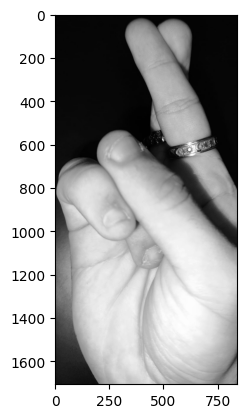

In [14]:
gray_hand = cv2.cvtColor(hand_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_hand, cmap='gray')
gray_hand

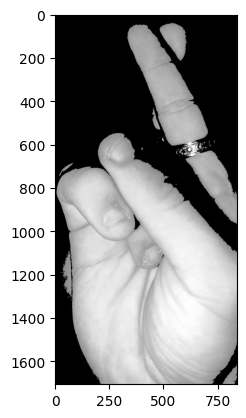

In [15]:
_,mask = cv2.threshold(gray_hand, 135, 255, cv2.THRESH_BINARY_INV)
background_mask = cv2.bitwise_not(mask)
black_background = np.zeros_like(gray_hand)

foreground = cv2.bitwise_and(gray_hand, gray_hand, mask=background_mask)
background = cv2.bitwise_and(black_background, black_background, mask=mask)
result = cv2.add(foreground, background)
plt.imshow(result, cmap='gray')

(400, 400)

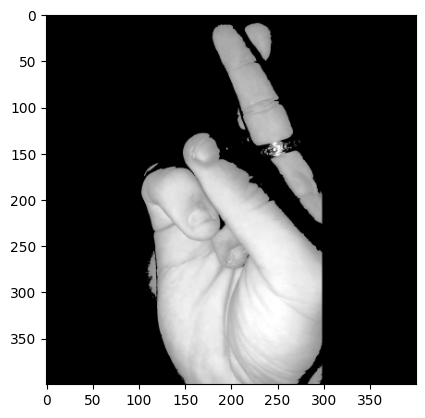

In [16]:
# Get the dimensions of the result image
height, width = result.shape

# Determine the size of the square
square_size = max(height, width)

# Create a new square image filled with black
square_image = np.zeros((square_size, square_size), dtype=np.uint8)

# Calculate the position to center the result image in the square image
y_offset = (square_size - height) // 2
x_offset = (square_size - width) // 2

# Place the result image in the center of the square image
square_image[y_offset:y_offset + height, x_offset:x_offset + width] = result

# Resize the square image to 400x400
resized_image = cv2.resize(square_image, (400, 400), interpolation=cv2.INTER_AREA)

# Display the resized image
plt.imshow(resized_image, cmap='gray')
resized_image.shape

In [17]:
img_resized = Image.fromarray(resized_image)

In [18]:
img_resized.save('hand_Marc_r.png')